# Photo Manipulation for High Contrast

This notebook demonstrates the drone footage under several different conditions (color, grayscale, HSV) to determine which manipulation would be easiest for the model to be able to differentiate human beings from background objects.

In [12]:
# Load packages
import cv2 # for interactive drawing/labeling
from PIL import Image # for conversion to grayscale
import matplotlib.pyplot as plt # for plotting 

We'll start with some swimmers in the ocean. When people are on surfboards, it's a lot easier to tell that they are human. However, when it's just a person in a wetsuit, often times it's difficult to determine whether this is a person or if it's actually a piece of floating kelp.

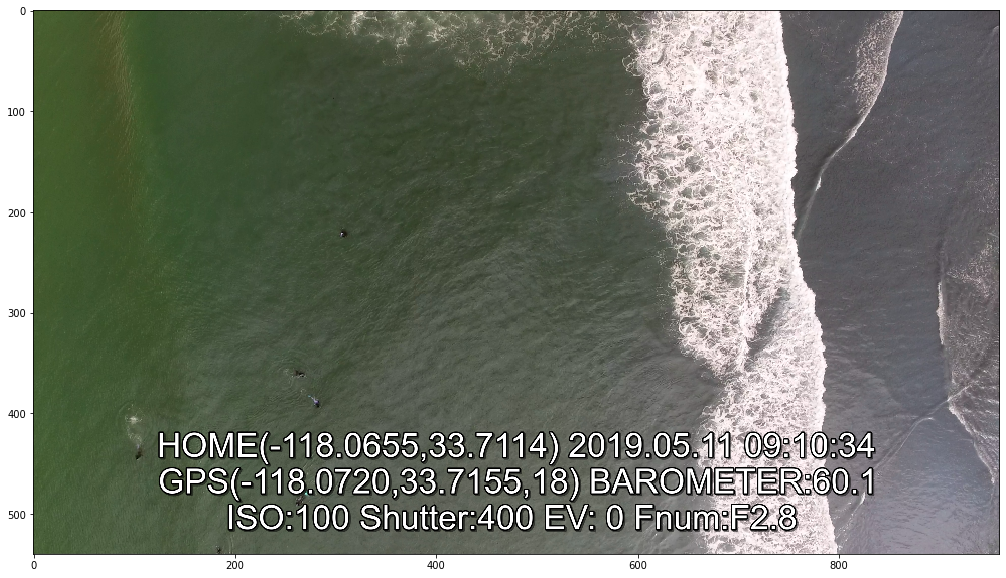

In [46]:
img1 = cv2.imread('data/raw/resized/vlcsnap-2019-10-03-13h43m35s494_resized.png')
    # first image, shows people in the ocean swimming without boards
plt.figure(figsize=(20,10)) # set appropriate size
plt.imshow(img1) # show image
plt.show() # show plot

As you can see, the people are small, black dots and are kind of hard to see. Below, there is an added layer that highlights where humans actually are.

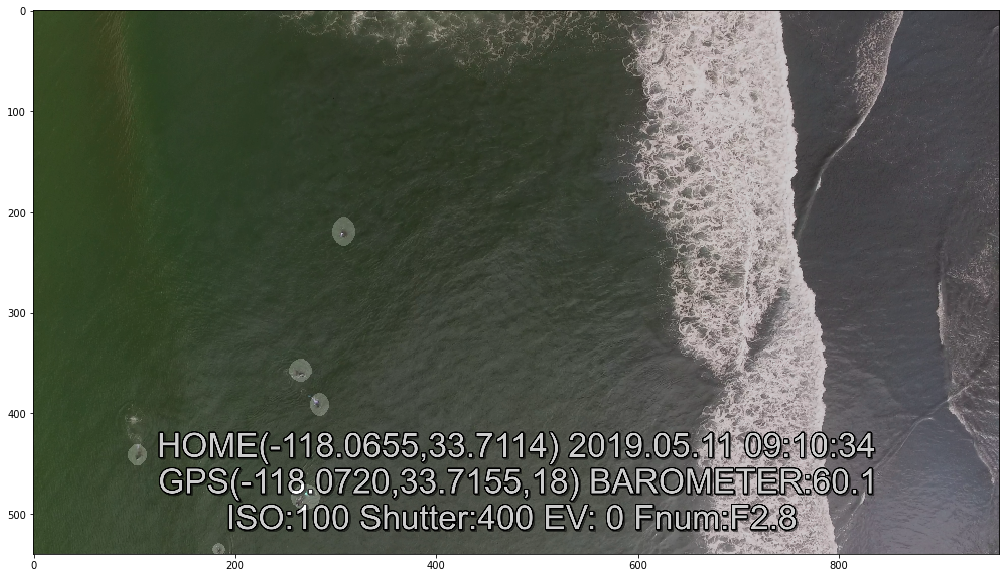

In [47]:
img1_labeled = cv2.imread('data/processed/vlcsnap-2019-10-03-13h43m35s494_labeled.png')
    # adding the labeled version
plt.figure(figsize=(20,10)) # set fig size
plt.imshow(img1) # show first image
plt.imshow(img1_labeled, alpha = 0.2) # overlay labeled version with with translucency
plt.show() # show plot

Often times, switching the color scheme of the image makes it easier for us (and the computer) to differentiate the objects. One color scheme that might work is grayscale.

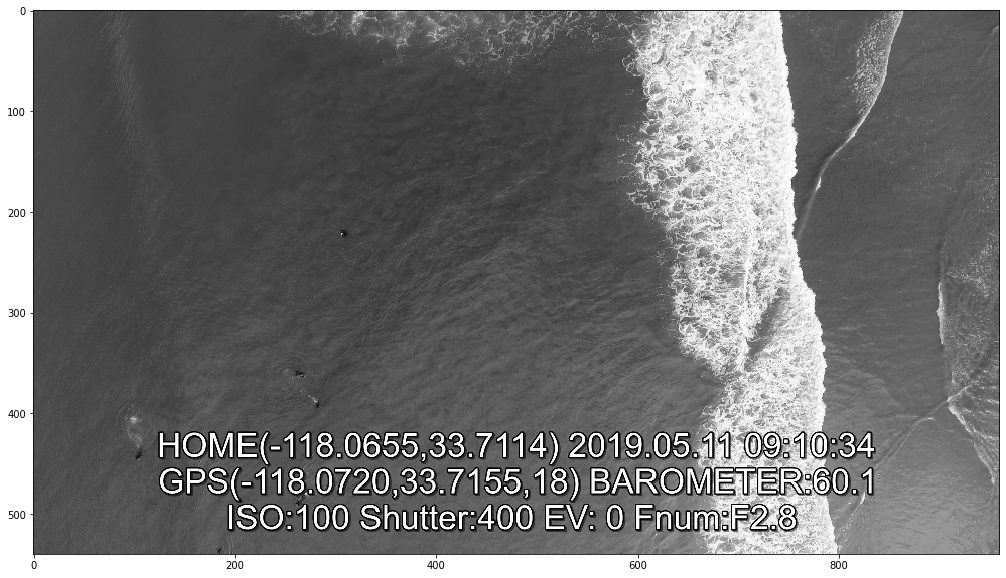

In [34]:
img1_gray = Image.open('data/raw/resized/vlcsnap-2019-10-03-13h43m35s494_resized.png').convert('LA')
    # converts to grayscale
plt.figure(figsize=(20,10)) # set figure size
plt.imshow(img1_gray) # show image
plt.show() # show plot

This seems to help, because the swimmers are much darker than the water, so the contrast appears to be slightly higher. Let's try HSV next, which sometimes really helps with contrast.

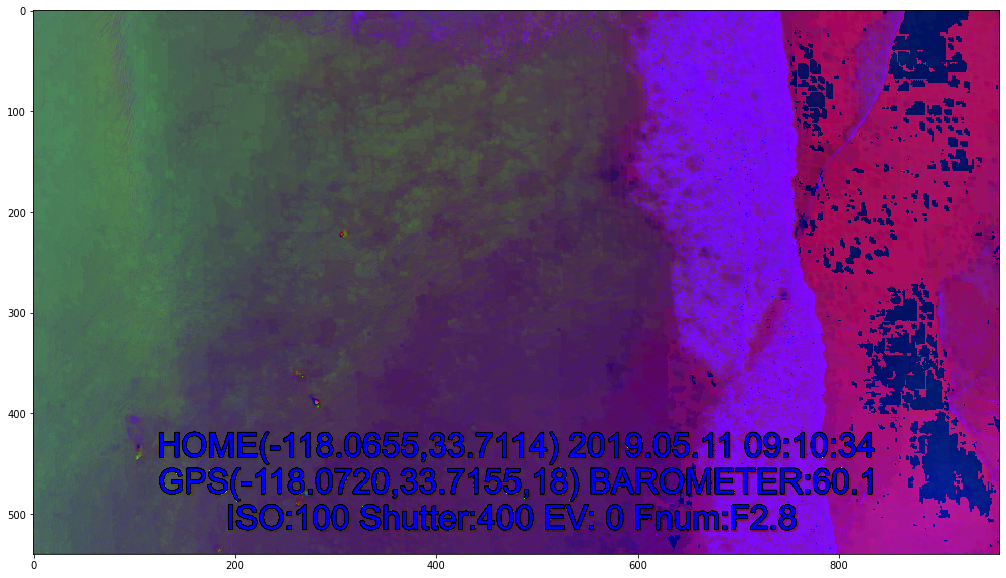

In [36]:
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) # convert to HSV
plt.figure(figsize=(20,10)) # set figure size
plt.imshow(img1_hsv) # show image
plt.show() # show plot

This color scheme really washed out the swimmers. Some are small, bright dots, but it is harder for me, as a human to be able to differentiate them from other things in the image. Let's try the same process on another photo. 

The photo below has people walking on the beach. It's important that we don't label the people's shadows, because the shadows aren't actually the people. Sometimes, a human and its shadow, in combination, can look very similar to a piece of kelp that has washed up on shore.

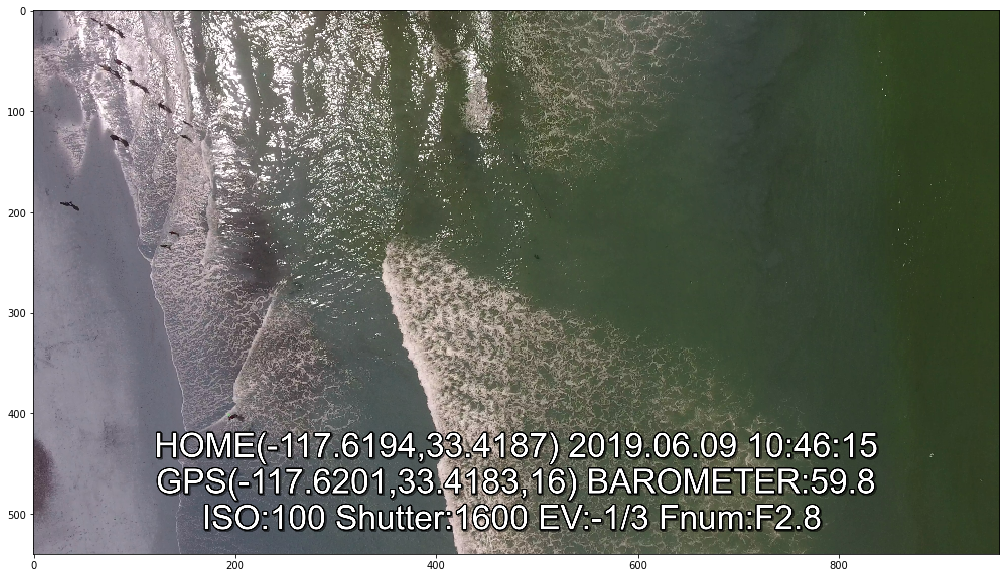

In [37]:
img2 = cv2.imread('data/raw/resized/vlcsnap-2019-10-17-16h11m49s241_resized.png')
    # load in second image
plt.figure(figsize=(20,10)) # set figure size
plt.imshow(img2) # show image
plt.show() # show plot

Below, the people have been highlighted once again by adding a labeled image on top.

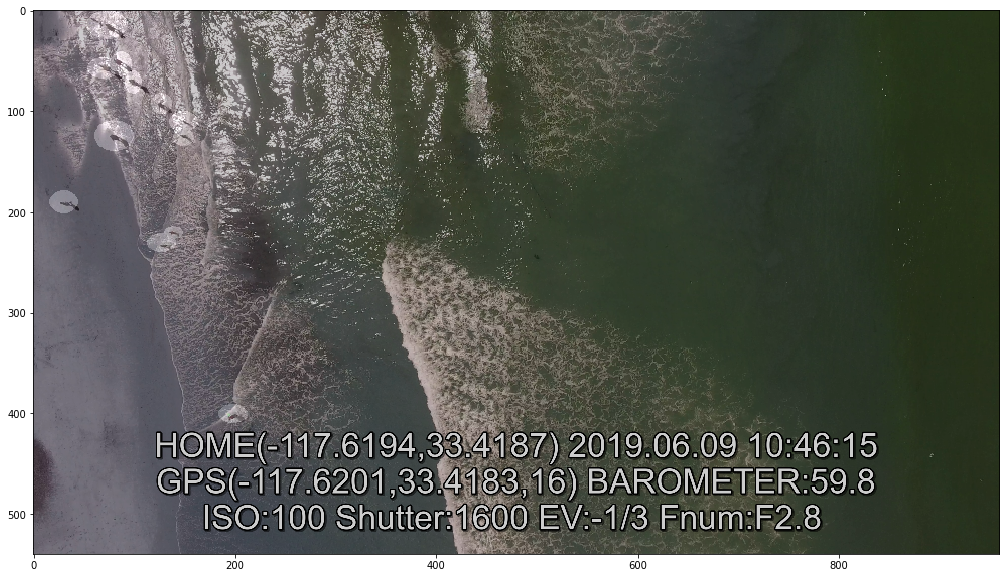

In [48]:
img2_labeled = cv2.imread('data/processed/vlcsnap-2019-10-17-16h11m49s241_labeled.png')
    # read in labeled image
plt.figure(figsize=(20,10)) # set figure size
plt.imshow(img2) # show first image
plt.imshow(img2_labeled, alpha=0.2) # show second image with translucency
plt.show() # show plot

Sometimes the people's shadows can even confuse humans, let's see if another color scheme can help us see the people more clearly than the shadows or the sand. The glare from the sun really makes this picture a bit difficult to interpret.

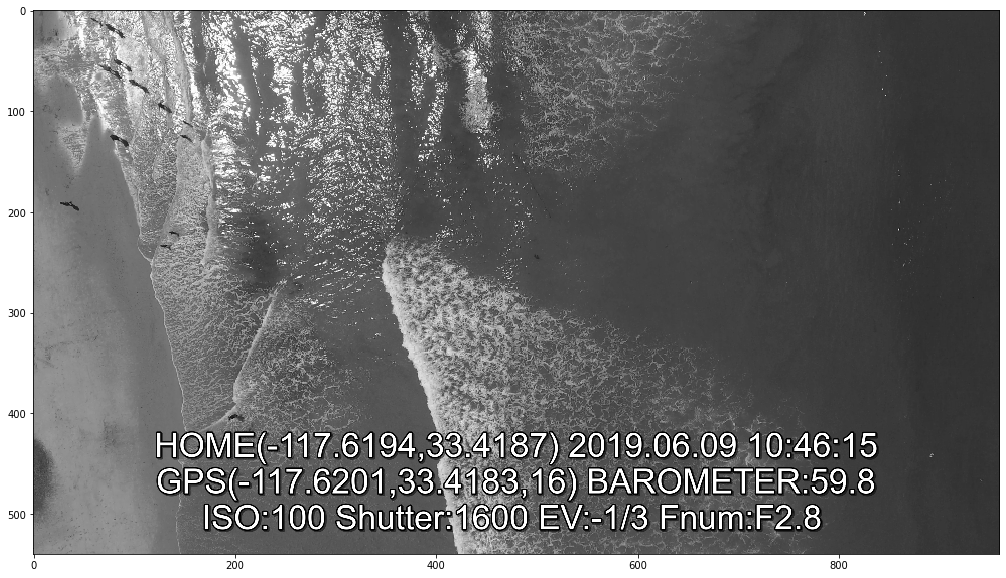

In [52]:
img2_gray = Image.open('data/raw/resized/vlcsnap-2019-10-17-16h11m49s241_resized.png').convert('LA')
    # convert to grayscale
plt.figure(figsize=(20,10)) # set figure size
plt.imshow(img2_gray) # show image
plt.show() # show plot

Now, the people stand out a lot more; they're very dark compared to their surroundings. However, we still have the issue of the people's shadows; they're black as well. Although we don't want the model to identify shadows as people, it might be outside of the scope of this project to get that specific. Most times, shadows that look like people are associated with people. So having the model label the shadow (with the person) might be okay. 

Let's see how this looks after we convert it to HSV below.

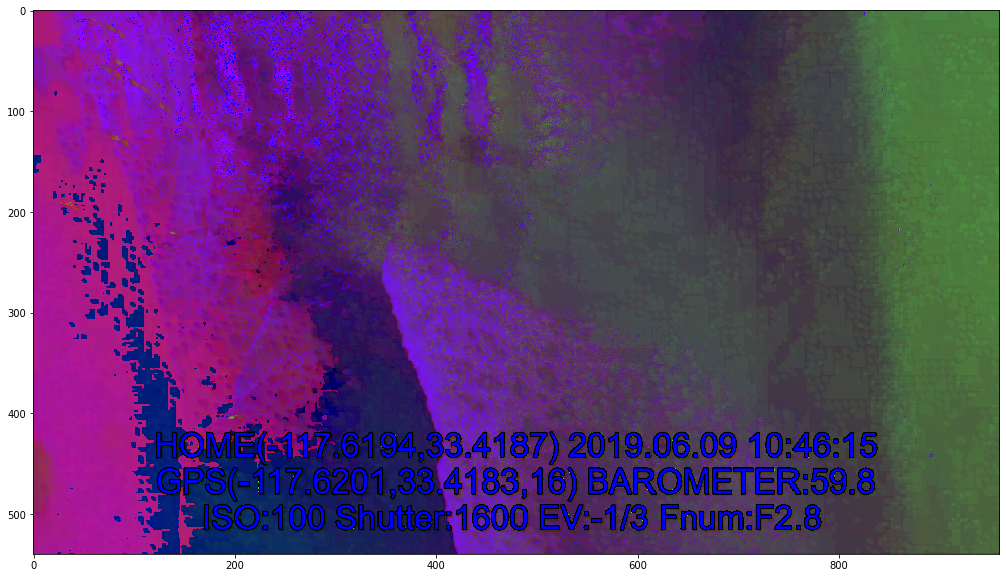

In [53]:
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV) # convert to HSV
plt.figure(figsize=(20,10)) # set figure size
plt.imshow(img2_hsv) # show image
plt.show() # show plot

We see above that the people got washed out again. Nowe they're slightly darker purple than the surrounding sand. This contrast doesn't seem to work as well as the grayscale color scheme.